In [8]:
!pip install datasets pillow matplotlib transformers torch --quiet

In [9]:
from datasets import load_dataset


In [10]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
dataset = load_dataset("Hemg/AI-Generated-vs-Real-Images-Datasets")
train_dataset = dataset['train']

Index: 90 | Label: 0


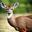

Index: 91 | Label: 0


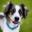

Index: 92 | Label: 0


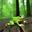

Index: 93 | Label: 0


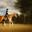

Index: 94 | Label: 0


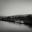

Index: 95 | Label: 0


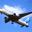

Index: 96 | Label: 0


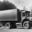

Index: 97 | Label: 0


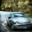

Index: 98 | Label: 0


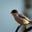

Index: 99 | Label: 0


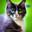

Index: 100 | Label: 0


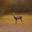

Index: 101 | Label: 0


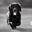

Index: 102 | Label: 0


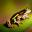

Index: 103 | Label: 0


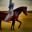

Index: 104 | Label: 0


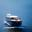

Index: 105 | Label: 0


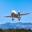

Index: 106 | Label: 0


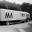

Index: 107 | Label: 0


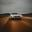

Index: 108 | Label: 0


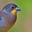

Index: 109 | Label: 0


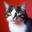

Index: 110 | Label: 0


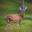

In [12]:
model_name = "Hemg/ai-vs-real-image-detection"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [13]:
from transformers import SiglipForImageClassification, AutoImageProcessor

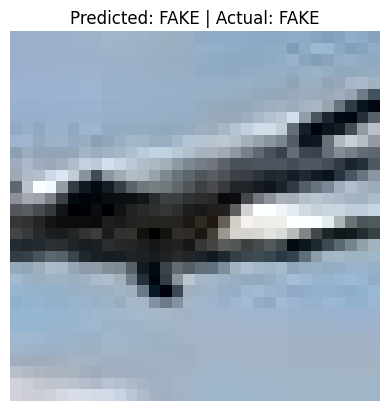

Index 97564: True = FAKE, Predicted = FAKE


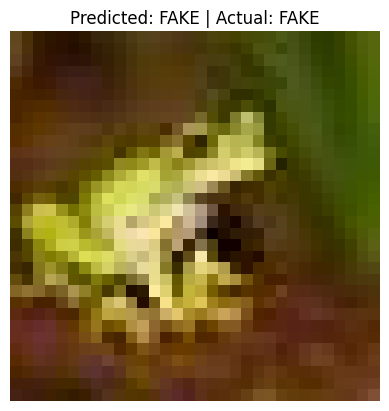

Index 59284: True = FAKE, Predicted = FAKE


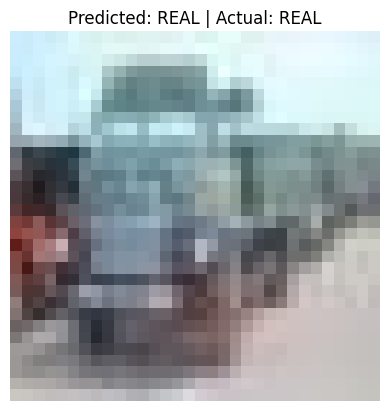

Index 26189: True = REAL, Predicted = REAL


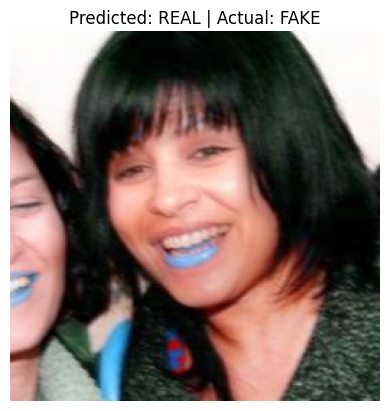

Index 124939: True = FAKE, Predicted = REAL


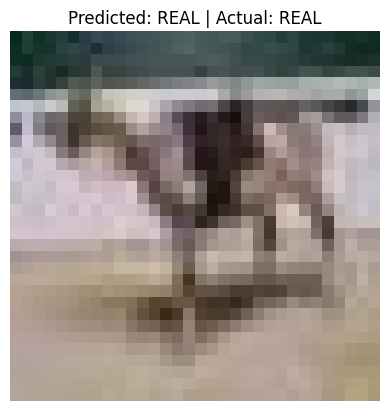

Index 134849: True = REAL, Predicted = REAL


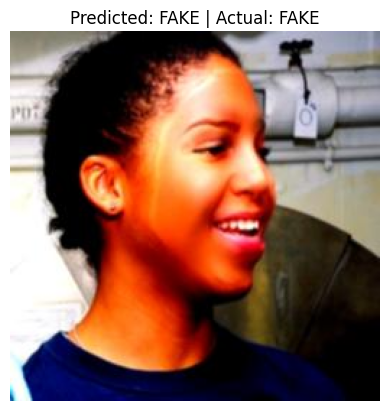

Index 134492: True = FAKE, Predicted = FAKE


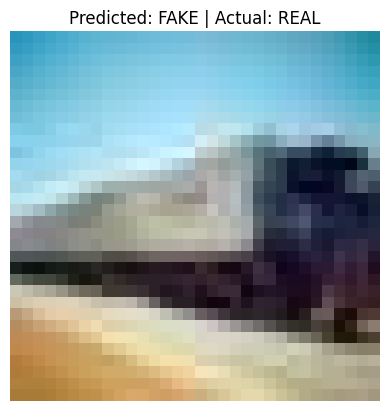

Index 65226: True = REAL, Predicted = FAKE


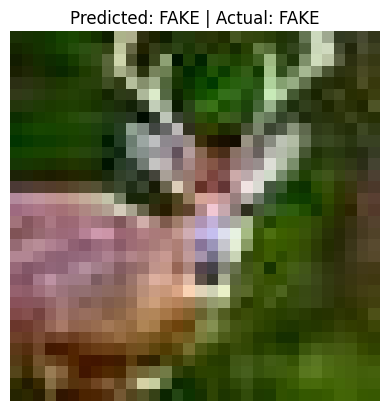

Index 34273: True = FAKE, Predicted = FAKE


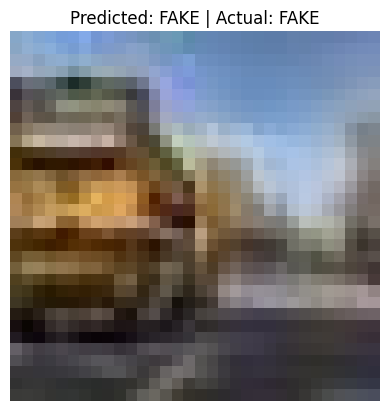

Index 141825: True = FAKE, Predicted = FAKE


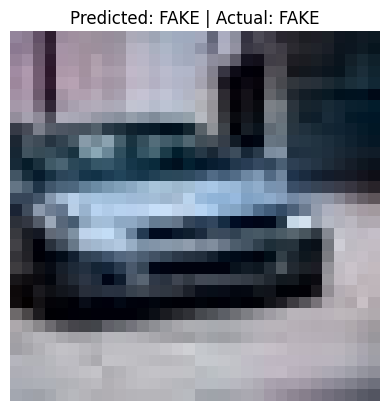

Index 29358: True = FAKE, Predicted = FAKE


In [26]:
import random

shuffled_dataset = train_dataset.shuffle(seed=42)

num_samples = 10

indices = list(range(len(shuffled_dataset)))
random.shuffle(indices)
selected_indices = indices[:num_samples]

for idx in selected_indices:
    example = shuffled_dataset[idx]
    image = example['image'].convert("RGB")
    true_label = example['label']

    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_label_idx = logits.argmax(-1).item()
    predicted_label = model.config.id2label[predicted_label_idx]

    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} | Actual: {model.config.id2label[true_label]}")
    plt.show()

    print(f"Index {idx}: True = {model.config.id2label[true_label]}, Predicted = {predicted_label}")


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
real_folder = "/content/drive/MyDrive/Data2/Test/Real"
#classes = ["Fake", "Real"]


In [24]:
import os

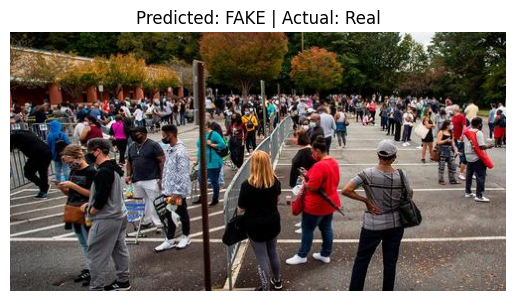

File: 100051.jpeg, True: Real, Predicted: FAKE


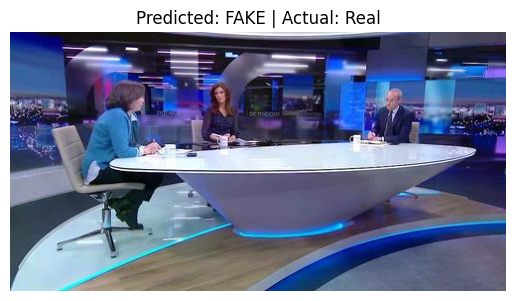

File: 100059.jpeg, True: Real, Predicted: FAKE


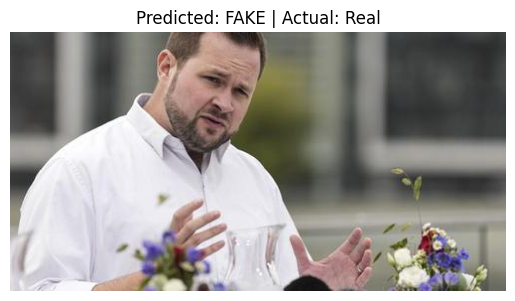

File: 100050.jpeg, True: Real, Predicted: FAKE


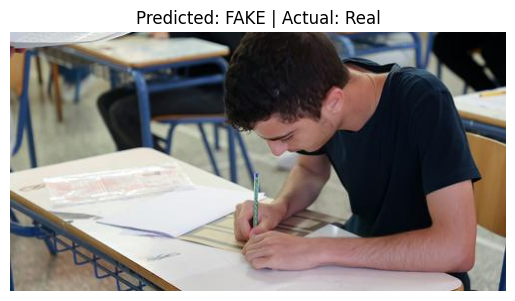

File: 100055.jpeg, True: Real, Predicted: FAKE


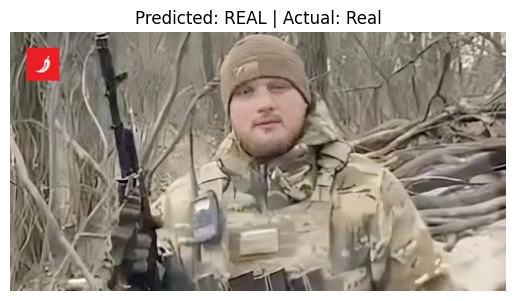

File: 100033.jpeg, True: Real, Predicted: REAL


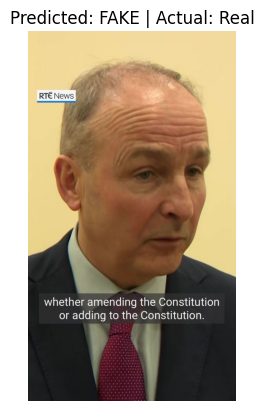

File: 100042.jpeg, True: Real, Predicted: FAKE


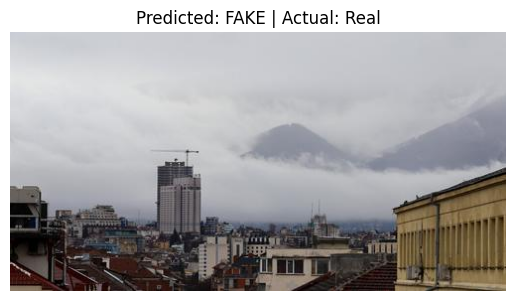

File: 100034.jpeg, True: Real, Predicted: FAKE


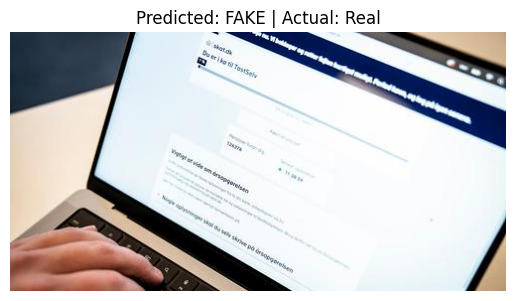

File: 100053.jpeg, True: Real, Predicted: FAKE


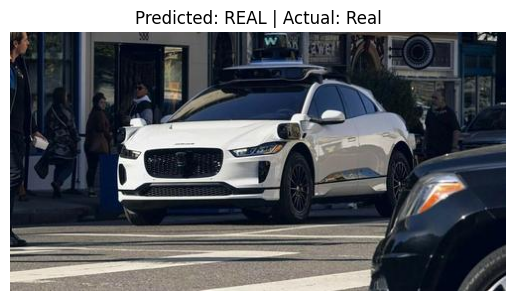

File: 100043.jpeg, True: Real, Predicted: REAL


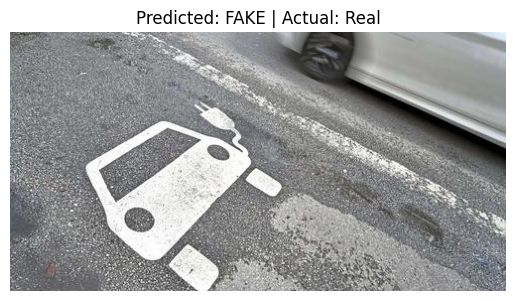

File: 100036.jpeg, True: Real, Predicted: FAKE


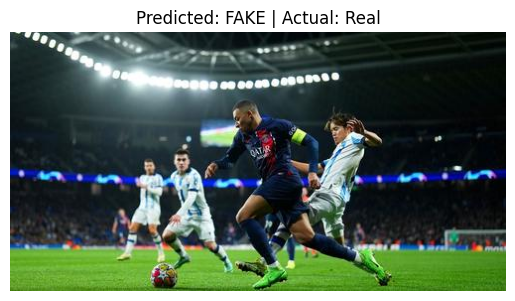

File: 100038.jpeg, True: Real, Predicted: FAKE


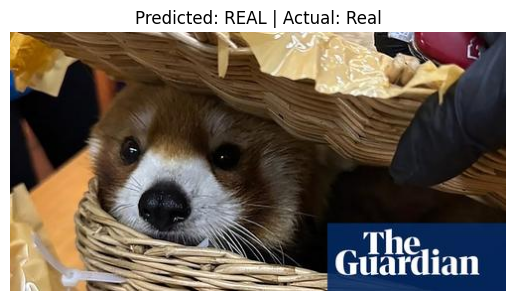

File: 100037.jpeg, True: Real, Predicted: REAL


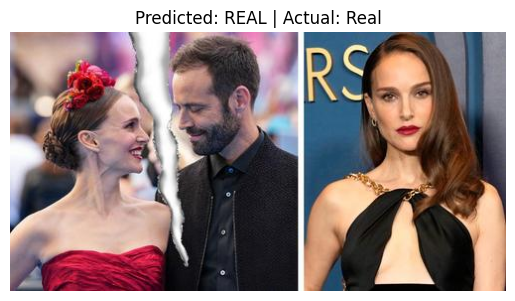

File: 100039.jpeg, True: Real, Predicted: REAL


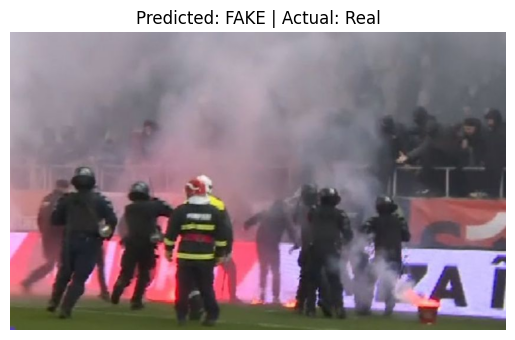

File: 100049.jpeg, True: Real, Predicted: FAKE


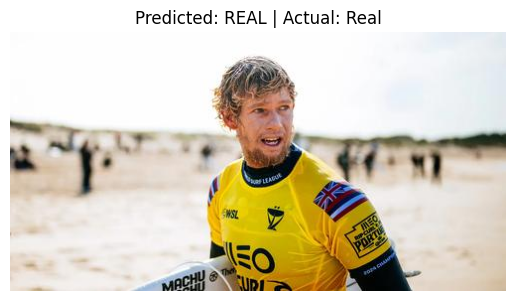

File: 100056.jpeg, True: Real, Predicted: REAL


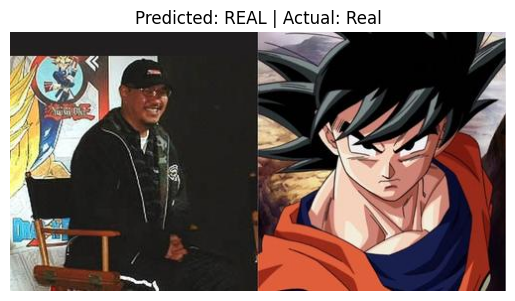

File: 100040.jpeg, True: Real, Predicted: REAL


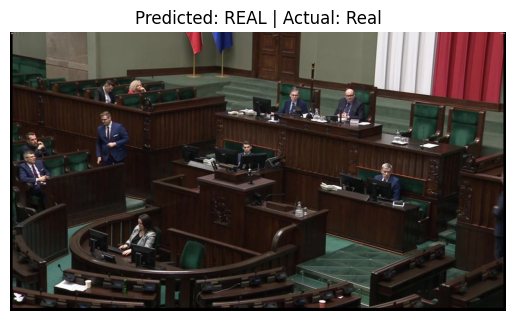

File: 100041.jpeg, True: Real, Predicted: REAL


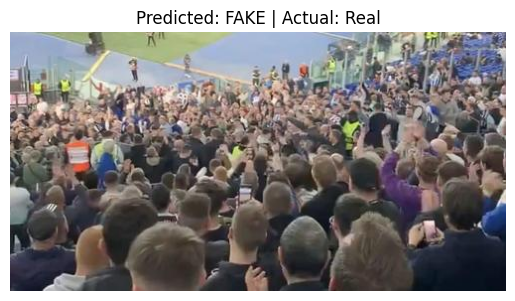

File: 100045.jpeg, True: Real, Predicted: FAKE


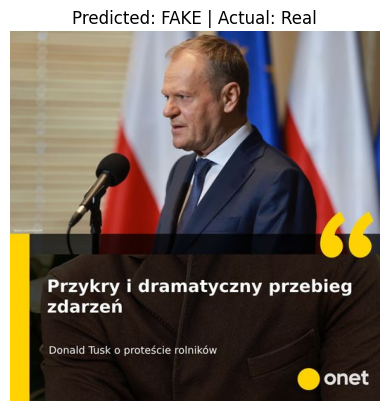

File: 100044.jpeg, True: Real, Predicted: FAKE


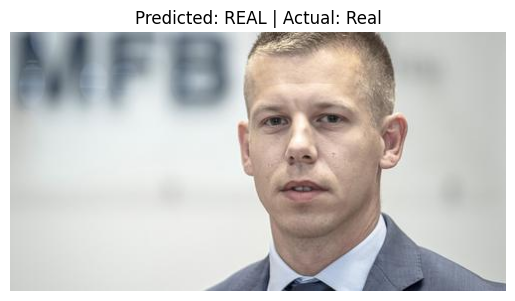

File: 100058.jpeg, True: Real, Predicted: REAL


In [25]:
max_samples = 20
count = 0

if not os.path.exists(real_folder):
    print(f"Folder {real_folder} not found!")
else:
    for filename in os.listdir(real_folder):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(real_folder, filename)
            image = Image.open(img_path).convert("RGB")

            inputs = processor(images=image, return_tensors="pt")
            with torch.no_grad():
                logits = model(**inputs).logits
            predicted_idx = logits.argmax(-1).item()
            predicted_label = model.config.id2label[predicted_idx]

            plt.imshow(image)
            plt.axis('off')
            plt.title(f"Predicted: {predicted_label} | Actual: Real")
            plt.show()

            print(f"File: {filename}, True: Real, Predicted: {predicted_label}")

            count += 1
            if count >= max_samples:
                break